## RAI vs EUR GBP CHF AUD JPY (base USD) 

Read on-chain RAI data

In [1]:
import os
import time
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import ExRates

from web3 import Web3, HTTPProvider

from abis import LINK_ETH, LINK_ETH_ABI, LINK_ETH_FIRST_BLOCK
from abis import LINK_RAI, LINK_RAI_ABI, LINK_RAI_FIRST_BLOCK
from abis import ORACLE_RELAYER, ORACLE_RELAYER_ABI, ORACLE_RELAYER_FIRST_BLOCK

from mp import fetch, fetch_link_mp, fetch_rp

size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,12),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

In [2]:
# Need an archive node

ETH_RPC_URL=os.environ['ETH_RPC_URL']
web3 = Web3(HTTPProvider(endpoint_uri=ETH_RPC_URL, request_kwargs={"timeout": 10}))
print(ETH_RPC_URL)

https://mainnet.infura.io/v3/6d7b5475e5a346738c8c72b1968e1d10


In [3]:
first_block = 13375000 # to be set to ~1 year before ExRates API start_date monthly, considering monthly output of data
interval = 6600 * 1 #number of blocks per day
num_blocks = None

latest_block = web3.eth.getBlock("latest")['number']

if not num_blocks:
    last_block = latest_block - 12
else:
    last_block = min(latest_block - 12, first_block + num_blocks)

print(f"first block {first_block}, last_block {last_block}")
blocks = list(range(first_block, last_block + 1, interval))

first block 13375000, last_block 16105317


In [4]:
rp_results = fetch(fetch_rp, 32, ORACLE_RELAYER, ORACLE_RELAYER_ABI, ETH_RPC_URL, blocks=blocks)

('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))HTTPSConnectionPool(host='mainnet.infura.io', port=443): Max retries exceeded with url: /v3/6d7b5475e5a346738c8c72b1968e1d10 (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:2548)')))HTTPSConnectionPool(host='mainnet.infura.io', port=443): Max retries exceeded with url: /v3/6d7b5475e5a346738c8c72b1968e1d10 (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:2548)')))('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))HTTPSConnectionPool(host='mainnet.infura.io', port=443): Max retries exceeded with url: /v3/6d7b5475e5a346738c8c72b1968e1d10 (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER

In [5]:
rp_df =pd.DataFrame(rp_results)
rp_df.head(2)

,0,1
0,13381600,3032134684672427850416659661
1,13388200,3032013803672735514292151368


In [6]:
rai = pd.DataFrame(rp_results, columns= ['block', 'price']).astype(object)
rai_df = rai.transpose()
rai_df

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
block,13381600,13388200,13394800,13401400,13408000,13414600,13421200,13427800,13434400,13441000,...,16041400,16048000,16054600,16061200,16067800,16074400,16081000,16087600,16094200,16100800
price,3032134684672427850416659661,3032013803672735514292151368,3031909135459809948613138523,3031748361979118521664296214,3031778134603059573660446849,3031730796985456346016183102,3031135028067832603070136833,3030767054672459018718362533,3030523701434297490691343220,3030443487827950124860934240,...,2814644496968528055865041700,2813782991716682117054593426,2813229912119470316733649808,2812696239913287559728854477,2812149534333707354873306181,2811629082222922897832314745,2811120973577428648785416956,2810608929795945747851557036,2810103065768966690714391974,2809599548674798469776242008


In [7]:
rai_df.loc['RAI'] = rai_df.loc['price']*1e-27
block_list = rai_df.loc['block']
for i in range(len(block_list)):
    time_stamp = web3.eth.getBlock(block_list[i]).timestamp
    rai_df.loc['UnixTimestamp',i] = time_stamp
rai_final_df = rai_df.loc[['UnixTimestamp','RAI']]

In [8]:
rai_final_df

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
UnixTimestamp,1633741956,1633832153,1633921101,1634010977,1634100384,1634190901,1634281651,1634370834,1634459971,1634549050,...,1669311731,1669391363,1669470995,1669550615,1669630259,1669709855,1669789511,1669869275,1669948871,1670028455
RAI,3.032135,3.032014,3.031909,3.031748,3.031778,3.031731,3.031135,3.030767,3.030524,3.030443,...,2.814644,2.813783,2.81323,2.812696,2.81215,2.811629,2.811121,2.810609,2.810103,2.8096


In [9]:
from ExRates import ExRates_final_df

In [10]:
from datetime import datetime
timestamp_list = rai_final_df.loc['UnixTimestamp']
for i in range(len(timestamp_list)):
    dates = datetime.fromtimestamp(timestamp_list[i])
    rai_final_df.loc['dates',i] = dates
rai_final_df.columns = rai_final_df.loc['dates']
rai_final_df.columns = rai_final_df.columns.normalize()
rai_final_df.columns.name = None
rai_final_df.drop(['dates'], axis=0, inplace= True)

In [11]:
ExRates_final_df

,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,...,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17
UnixTimestamp,1637107200,1637193600,1637280000,1637366400,1637452800,1637539200,1637625600,1637712000,1637798400,1637884800,...,1667865600,1667952000,1668038400,1668124800,1668211200,1668297600,1668384000,1668470400,1668556800,1668643200
EUR,1.131867,1.136887,1.128026,1.128026,1.12752,1.124164,1.124352,1.120272,1.120938,1.131857,...,1.007927,1.001445,1.01942,1.037183,1.037291,1.032818,1.031891,1.035824,1.039425,1.036135
GBP,1.348845,1.34991,1.344681,1.3445,1.343382,1.339746,1.337497,1.332985,1.331315,1.33425,...,1.155088,1.136275,1.170104,1.1812,1.18375,1.179844,1.175045,1.188425,1.191519,1.18593
CHF,1.076878,1.080261,1.076832,1.077005,1.076004,1.072173,1.07122,1.070532,1.06906,1.083182,...,1.015533,1.016198,1.036409,1.060891,1.063185,1.059199,1.059992,1.060412,1.058862,1.049439
AUD,0.726825,0.727685,0.723788,0.723788,0.723135,0.722687,0.72212,0.720203,0.717485,0.7123,...,0.650815,0.64265,0.660805,0.670309,0.6703,0.669846,0.669175,0.677075,0.673945,0.66889
CAD,0.792864,0.79344,0.790883,0.790883,0.790242,0.787213,0.788808,0.789858,0.789646,0.781525,...,0.745115,0.739068,0.750252,0.753602,0.795855,0.753829,0.750444,0.753474,0.749887,0.750585
JPY,0.008758,0.00875,0.00877,0.00877,0.008761,0.00871,0.008683,0.008664,0.008692,0.008821,...,0.00688,0.006836,0.007058,0.007204,0.007204,0.007165,0.007137,0.0072,0.007178,0.007122
CNY,0.15679,0.15659,0.156563,0.156563,0.156563,0.156607,0.156448,0.156426,0.156567,0.15642,...,0.137944,0.138029,0.13914,0.140681,0.140683,0.140683,0.141362,0.141955,0.14108,0.139719


In [12]:
ExRates_final_df = ExRates_final_df.transpose()
ExRates_final_df

,UnixTimestamp,EUR,GBP,CHF,AUD,CAD,JPY,CNY
2021-11-17,1637107200,1.131867,1.348845,1.076878,0.726825,0.792864,0.008758,0.15679
2021-11-18,1637193600,1.136887,1.34991,1.080261,0.727685,0.79344,0.00875,0.15659
2021-11-19,1637280000,1.128026,1.344681,1.076832,0.723788,0.790883,0.00877,0.156563
2021-11-20,1637366400,1.128026,1.3445,1.077005,0.723788,0.790883,0.00877,0.156563
2021-11-21,1637452800,1.12752,1.343382,1.076004,0.723135,0.790242,0.008761,0.156563
...,...,...,...,...,...,...,...,...
2022-11-13,1668297600,1.032818,1.179844,1.059199,0.669846,0.753829,0.007165,0.140683
2022-11-14,1668384000,1.031891,1.175045,1.059992,0.669175,0.750444,0.007137,0.141362
2022-11-15,1668470400,1.035824,1.188425,1.060412,0.677075,0.753474,0.0072,0.141955
2022-11-16,1668556800,1.039425,1.191519,1.058862,0.673945,0.749887,0.007178,0.14108


In [13]:
rai_final_df = rai_final_df.transpose()
rai_final_df

,UnixTimestamp,RAI
2021-10-09,1633741956,3.032135
2021-10-10,1633832153,3.032014
2021-10-11,1633921101,3.031909
2021-10-12,1634010977,3.031748
2021-10-13,1634100384,3.031778
...,...,...
2022-11-29,1669709855,2.811629
2022-11-30,1669789511,2.811121
2022-12-01,1669869275,2.810609
2022-12-02,1669948871,2.810103


In [14]:
df = pd.merge(ExRates_final_df, rai_final_df, left_index=True, right_index=True)
df = df.drop(columns='UnixTimestamp_y', axis=1)
df.to_csv('RAIvsEURGBPCHFAUDJPYCNY.csv')
df

,UnixTimestamp_x,EUR,GBP,CHF,AUD,CAD,JPY,CNY,RAI
2021-11-18,1637193600,1.136887,1.34991,1.080261,0.727685,0.79344,0.00875,0.15659,3.02772
2021-11-19,1637280000,1.128026,1.344681,1.076832,0.723788,0.790883,0.00877,0.156563,3.027756
2021-11-20,1637366400,1.128026,1.3445,1.077005,0.723788,0.790883,0.00877,0.156563,3.027811
2021-11-21,1637452800,1.12752,1.343382,1.076004,0.723135,0.790242,0.008761,0.156563,3.0279
2021-11-22,1637539200,1.124164,1.339746,1.072173,0.722687,0.787213,0.00871,0.156607,3.028003
...,...,...,...,...,...,...,...,...,...
2022-11-13,1668297600,1.032818,1.179844,1.059199,0.669846,0.753829,0.007165,0.140683,2.820141
2022-11-14,1668384000,1.031891,1.175045,1.059992,0.669175,0.750444,0.007137,0.141362,2.819825
2022-11-15,1668470400,1.035824,1.188425,1.060412,0.677075,0.753474,0.0072,0.141955,2.819525
2022-11-16,1668556800,1.039425,1.191519,1.058862,0.673945,0.749887,0.007178,0.14108,2.81914


In [15]:
df.index

DatetimeIndex(['2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27',
               ...
               '2022-11-09', '2022-11-10', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17'],
              dtype='datetime64[ns]', length=332, freq=None)

In [16]:
first_date = min(df.index.normalize())
rai_setpoint = df.loc[first_date, 'RAI']
eur_setpoint = df.loc[first_date, 'EUR']
gbp_setpoint = df.loc[first_date, 'GBP']
chf_setpoint = df.loc[first_date, 'CHF']
aud_setpoint = df.loc[first_date, 'AUD']
cad_setpoint = df.loc[first_date, 'CAD']
jpy_setpoint = df.loc[first_date, 'JPY']
cny_setpoint = df.loc[first_date, 'CNY']
df['rai_norm'] = (df['RAI']/rai_setpoint)
df['eur_norm'] = (df['EUR']/eur_setpoint)
df['gbp_norm'] = (df['GBP']/gbp_setpoint)
df['chf_norm'] = (df['CHF']/chf_setpoint)
df['aud_norm'] = (df['AUD']/aud_setpoint)
df['cad_norm'] = (df['CAD']/cad_setpoint)
df['jpy_norm'] = (df['JPY']/jpy_setpoint)
df['cny_norm'] = (df['CNY']/cny_setpoint)

In [17]:
df


,UnixTimestamp_x,EUR,GBP,CHF,AUD,CAD,JPY,CNY,RAI,rai_norm,eur_norm,gbp_norm,chf_norm,aud_norm,cad_norm,jpy_norm,cny_norm
2021-11-18,1637193600,1.136887,1.34991,1.080261,0.727685,0.79344,0.00875,0.15659,3.02772,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-11-19,1637280000,1.128026,1.344681,1.076832,0.723788,0.790883,0.00877,0.156563,3.027756,1.000012,0.992206,0.996126,0.996825,0.994645,0.996777,1.002298,0.999827
2021-11-20,1637366400,1.128026,1.3445,1.077005,0.723788,0.790883,0.00877,0.156563,3.027811,1.00003,0.992206,0.995992,0.996985,0.994645,0.996777,1.002298,0.999827
2021-11-21,1637452800,1.12752,1.343382,1.076004,0.723135,0.790242,0.008761,0.156563,3.0279,1.00006,0.991761,0.995164,0.996059,0.993747,0.99597,1.001257,0.999827
2021-11-22,1637539200,1.124164,1.339746,1.072173,0.722687,0.787213,0.00871,0.156607,3.028003,1.000094,0.988809,0.992471,0.992513,0.993132,0.992151,0.995384,1.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,1668297600,1.032818,1.179844,1.059199,0.669846,0.753829,0.007165,0.140683,2.820141,0.931441,0.908461,0.874016,0.980502,0.920517,0.950078,0.818898,0.898413
2022-11-14,1668384000,1.031891,1.175045,1.059992,0.669175,0.750444,0.007137,0.141362,2.819825,0.931336,0.907646,0.870462,0.981237,0.919595,0.94581,0.815625,0.902754
2022-11-15,1668470400,1.035824,1.188425,1.060412,0.677075,0.753474,0.0072,0.141955,2.819525,0.931237,0.911106,0.880373,0.981625,0.930451,0.94963,0.822893,0.906537
2022-11-16,1668556800,1.039425,1.191519,1.058862,0.673945,0.749887,0.007178,0.14108,2.81914,0.93111,0.914273,0.882665,0.980191,0.926149,0.945108,0.82035,0.900948


In [18]:
# df['dates'] = df.index.astype(object)
# df

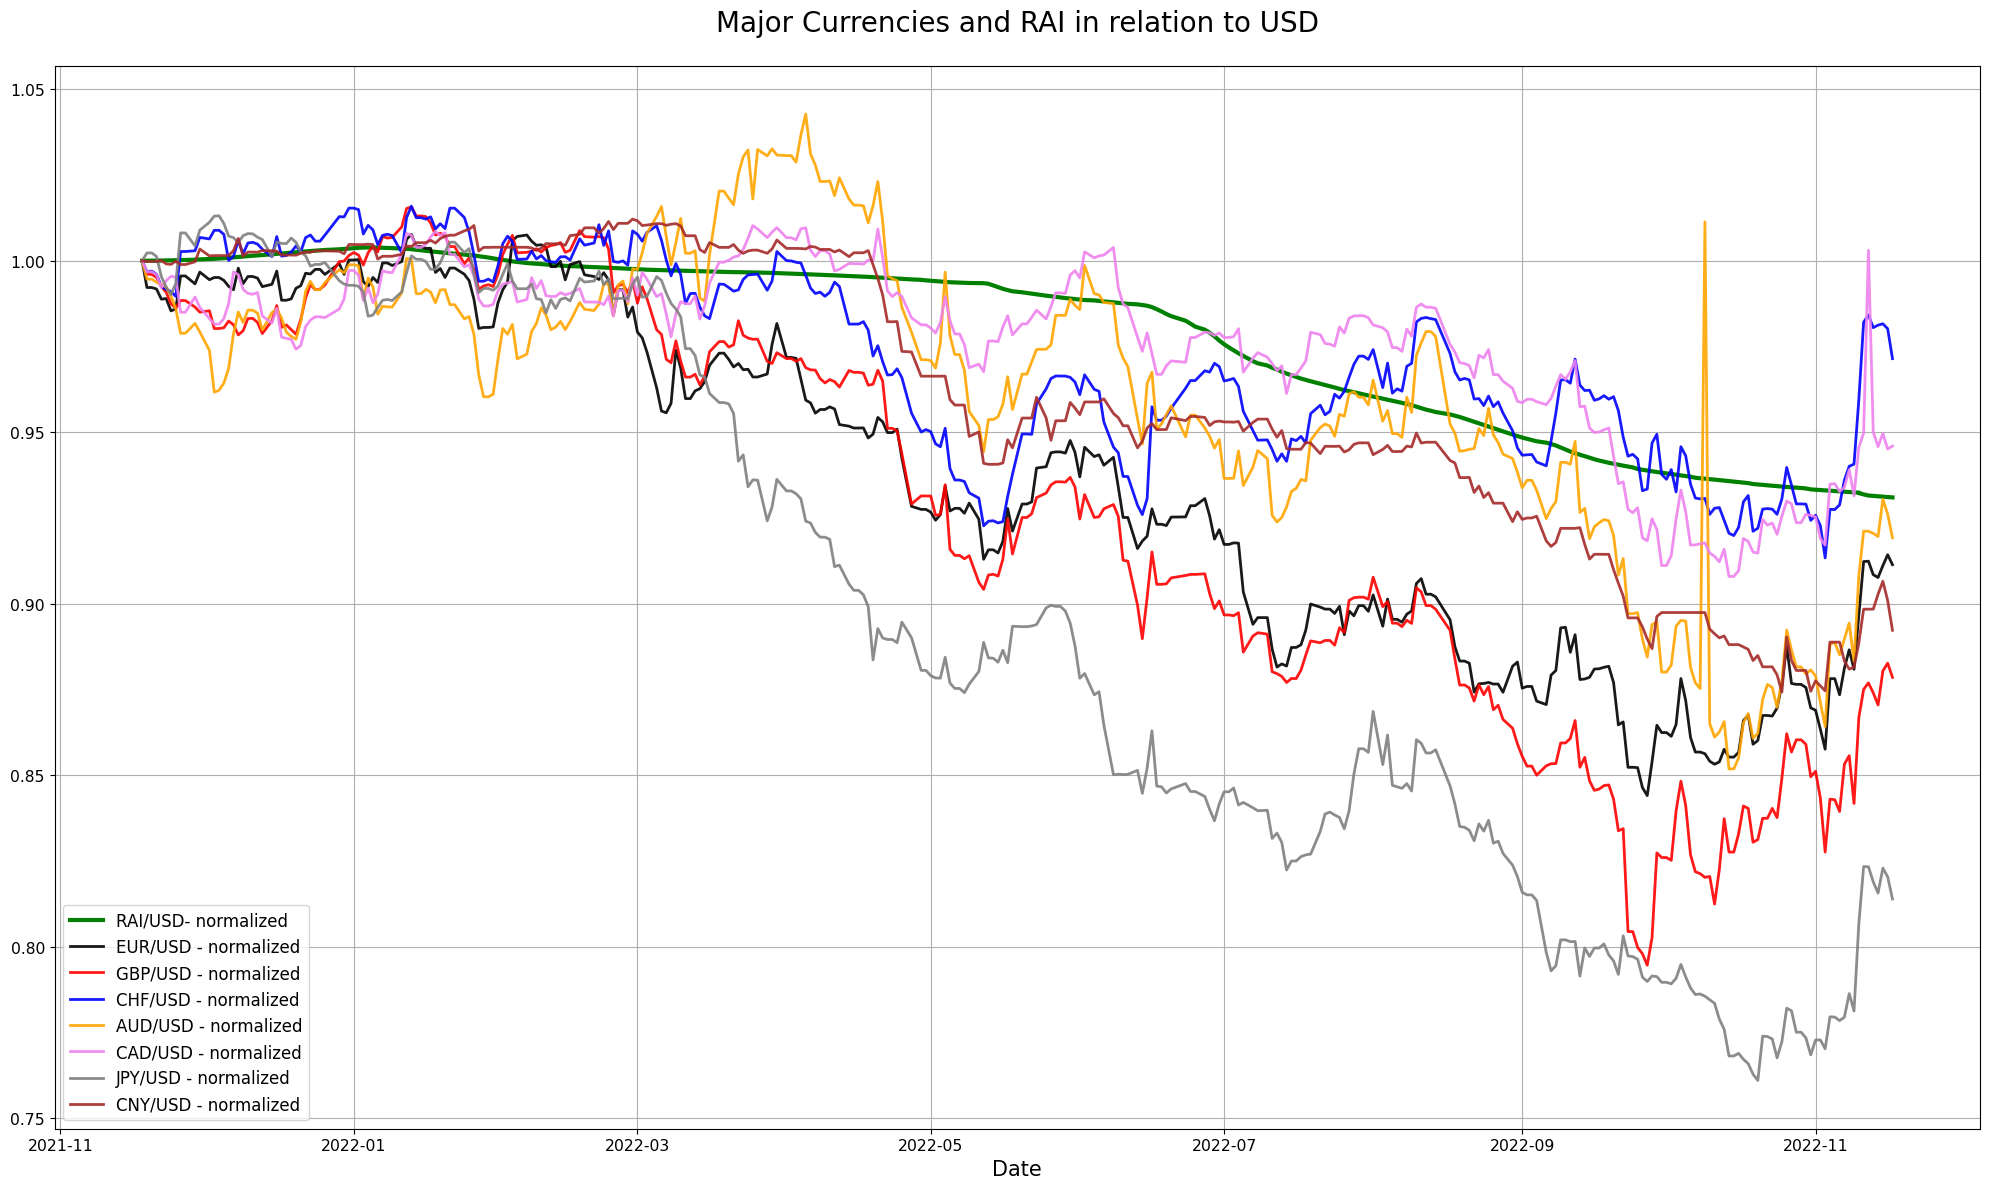

In [19]:
fig, ax = plt.subplots(1,1)
ax.set_title('Major Currencies and RAI in relation to USD', size=20)
ax.plot(df['rai_norm'], label = 'RAI/USD- normalized', linewidth = 3, color = 'green')
ax.plot(df['eur_norm'], linewidth= 2, alpha= 0.9, label='EUR/USD - normalized', color='black')
ax.plot(df['gbp_norm'], linewidth= 2, alpha= 0.9, label='GBP/USD - normalized', color='red')
ax.plot(df['chf_norm'], linewidth= 2, alpha= 0.9, label='CHF/USD - normalized', color='blue')
ax.plot(df['aud_norm'], linewidth= 2, alpha= 0.9, label='AUD/USD - normalized', color='orange')
ax.plot(df['cad_norm'], linewidth= 2, alpha= 0.9, label='CAD/USD - normalized', color='violet')
ax.plot(df['jpy_norm'], linewidth= 2, alpha= 0.9, label='JPY/USD - normalized', color='gray')
ax.plot(df['cny_norm'], linewidth= 2, alpha= 0.9, label='CNY/USD - normalized', color='brown')
ax.set_xlabel('Date')
# ax.set_ylabel('/USD (normalised)')
ax.legend()
ax.grid()
fig.tight_layout()